In [30]:
import io
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )
from IPython.display import display, Markdown

In [31]:
from VerityPy.processing import qualityanalysis, field
from VerityPy.utils import reportfuncs
import VerityPy

In [32]:
# initialize matplotlib and pandas
plt.close("all")
pd.set_option("display.width",200)
pd.set_option("display.max_colwidth",100)
pd.set_option("display.max_rows",None)

In [33]:
# test VerityPy library is active by checking type
print(f"report is VerityPy type={type(report_asis)}")
if not VerityPy.__version__ is None:
    print(f"VerityPy version= {VerityPy.__version__}")

report is VerityPy type=<class 'VerityPy.processing.qualityanalysis.QualityAnalysis'>
VerityPy version= 2024.1.20


In [34]:
# set constants
DQ:str="\""
CRLF:str="\r\n"
LF:str="\n"
TAB:str="\t"

In [35]:
file_uris_data:list=[]
file_uris_report:list=[]
fields_asis:list=[]
fields_remediated:list=[]
fields_final:list=[]
recs_asis:list=[]  # will be list of lists with each entry a list of field values whose length should equal FIELDS_xxx length
recs_remediated:list=[]
recs_final:list=[]
report_asis: qualityanalysis.QualityAnalysis= qualityanalysis.QualityAnalysis()
report_remediated: qualityanalysis.QualityAnalysis= qualityanalysis.QualityAnalysis()
report_final: qualityanalysis.QualityAnalysis= qualityanalysis.QualityAnalysis()

In [36]:
# set files we will use. indexing: 0=as-is, 1=remediated, 2=final. Each data file has header line in file. Delimiters: as-is=comma, remediated=comma, final=pipe
DATADIR_PY:str="VerityPy_data/"
DATADIR_DOTNET:str="VerityDotNet_data/"
# original data file
file_uris_data.append(DATADIR_PY + "IRSMigration_WithErrors_Hdr.csv")
# Use this group for VerityPy data
#print(f"Data From VerityPy")
# file_uris_data.append(DATADIR_PY + "IRSMigration_WithErrors_Hdr_remediated_data.dat")
# file_uris_data.append(DATADIR_PY + "IRSMigration_WithErrors_Hdr_final_data.dat")
# file_uris_report.append(DATADIR_PY + "IRSMigration_WithErrors_Hdr_report.dat")
# file_uris_report.append(DATADIR_PY + "IRSMigration_WithErrors_Hdr_remediated_report.dat")
# file_uris_report.append(DATADIR_PY + "IRSMigration_WithErrors_Hdr_final_report.dat")

#Use this group for VerityDotNet data
print(f"Data From VerityDotNet")
file_uris_data.append(DATADIR_DOTNET + "TestRefine_IRS_outrecs_remediated.dat")
file_uris_data.append(DATADIR_DOTNET + "TestRefine_IRS_outrecs_final.dat")
file_uris_report.append(DATADIR_DOTNET + "TestRefine_IRS_report_asis.dat")
file_uris_report.append(DATADIR_DOTNET + "TestRefine_IRS_report_remediated.dat")
file_uris_report.append(DATADIR_DOTNET + "TestRefine_IRS_report_final.dat")

Data From VerityDotNet


### Loading Results from VerityX

In [37]:
# read data files
nline:int=0
with open(file_uris_data[0], "r", encoding="utf-8") as f:
    for line in f:
        if line is None:
            break
        if line.endswith(CRLF):
            line=line[:-2]
        if line.endswith(LF):
            line=line[:-1]
        if len(line)>0 and not line.startswith("#") and not line.startswith("//"):
            nline += 1
            if nline==1:
                fields_asis= line.split(",")
            else:
                recs_asis.append(line)

nline=0
with open(file_uris_data[1], "r", encoding="utf-8") as f:
    for line in f:
        if line is None:
            break
        if line.endswith(CRLF):
            line=line[:-2]
        if line.endswith(LF):
            line=line[:-1]
        if len(line)>0 and not line.startswith("#") and not line.startswith("//"):
            nline += 1
            if nline==1:
                fields_remediated= line.split(",")
            else:
                recs_remediated.append(line)

nline=0
with open(file_uris_data[2], "r", encoding="utf-8") as f:
    for line in f:
        if line is None:
            break
        if line.endswith(CRLF):
            line=line[:-2]
        if line.endswith(LF):
            line=line[:-1]
        if len(line)>0 and not line.startswith("#") and not line.startswith("//"):
            nline += 1
            if nline==1:
                fields_final= line.split("|")
            else:
                recs_final.append(line)

### Report Overview

The table below lists the detected errors in the As-is, remediated, and final (i.e. normalized and enriched) data sets. Remediation fixed parsing errors as intended and then the Normalizing and Enriching functions fixed all remaining errors and generated a high quality data set ready for further analytics and AI/ML modeling.

In [38]:
# read reports
report_asis= reportfuncs.make_report_from_file(file_uris_report[0])
if report_asis is None or report_asis.status.startswith("notok:"):
    raise ValueError("failed to read report_asis")
report_remediated= reportfuncs.make_report_from_file(file_uris_report[1])
if report_remediated is None or report_remediated.status.startswith("notok:"):
    raise ValueError("failed to read report_remediated")
report_final= reportfuncs.make_report_from_file(file_uris_report[2])
if report_final is None or report_final.status.startswith("notok:"):
    raise ValueError("failed to read report_final")

In [39]:
# overview from reports
summaryArr=[]
summaryArr.append({'item':'number records','as-is':len(recs_asis),'remediated':len(recs_remediated),'final':len(recs_final)})
summaryArr.append({'item':'parsing errors-small1','as-is':report_asis.rec_parse_errs['small1'],'remediated':report_remediated.rec_parse_errs['small1'],'final':report_final.rec_parse_errs['small1']})
summaryArr.append({'item':'parsing errors-small2','as-is':report_asis.rec_parse_errs['small2'],'remediated':report_remediated.rec_parse_errs['small2'],'final':report_final.rec_parse_errs['small2']})
summaryArr.append({'item':'parsing errors-big','as-is':report_asis.rec_parse_errs['big'],'remediated':report_remediated.rec_parse_errs['big'],'final':report_final.rec_parse_errs['big']})
summaryArr.append({'item':'number records with errors','as-is':report_asis.err_stats['numrecs_err'],'remediated':report_remediated.err_stats['numrecs_err'],'final':report_final.err_stats['numrecs_err']})
summaryArr.append({'item':'number records with datatype errors','as-is':report_asis.err_stats['numrecs_err_datatype'],'remediated':report_remediated.err_stats['numrecs_err_datatype'],'final':report_final.err_stats['numrecs_err_datatype']})
summaryArr.append({'item':'number records with format errors','as-is':report_asis.err_stats['numrecs_err_fmt'],'remediated':report_remediated.err_stats['numrecs_err_fmt'],'final':report_final.err_stats['numrecs_err_fmt']})
summaryArr.append({'item':'number fields with datatype errors','as-is':len(report_asis.err_stats['fields_err_datatype']),'remediated':len(report_remediated.err_stats['fields_err_datatype']),'final':len(report_final.err_stats['fields_err_datatype'])})

dfSummary=pd.DataFrame(summaryArr).style.hide()
display(dfSummary)

Quality Factors are computed for each field using VerityPy's expert algorithms. These take into account errors and inconsistencies in structure and semantics for all records and fields. They should always be >= 99 for a high quality data set and =100 for a well managed Quality Controlled process feeding trusted Data Science and AI applications. The chart below shows that Verity processing successfully converted low quality source data into high quality final data.

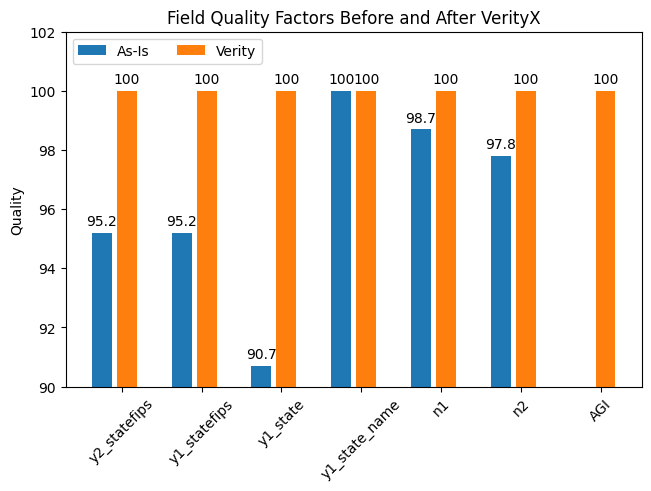

In [40]:
# show improvement with VerityPy processing using field quality metric
fldqual={'As-Is':[],'Verity':[]}
flds=[]
for i in range(len(report_asis.fields)):
    flds.append(report_asis.fields[i].title)
    fldqual['As-Is'].append(float(report_asis.field_quality[i]))
    fldqual['Verity'].append(float(report_final.field_quality[i]))

x= np.arange(len(flds))
width=0.25
multiplier=0
fig, ax = plt.subplots(layout='constrained')
for k,v in fldqual.items():
    offset=width*multiplier
    rects=ax.bar(x+offset,v,width,label=k)
    ax.bar_label(rects, padding=3)
    multiplier += 1.25
ax.set_ylabel("Quality")
ax.set_title("Field Quality Factors Before and After VerityX")
ax.set_xticks(x+width, labels=flds, rotation=45)
ax.set_ylim(90,102)
ax.legend(loc='upper left', ncols=2)
plt.show()

In [41]:
print("Field Title Map: As-Is (source) --> Verity (target). Enrichment fields do not have source mapping. Unique Values (UV) excluding '-other-' listed as value(count)")
field_info=[]
for i in range(len(report_final.fields)):
    title= report_asis.fields[i].title if i< len(report_asis.fields) else ""
    uvhigh_asis=""
    uvlow_asis=""
    uvhigh_final=""
    uvlow_final=""
    nmax=-1
    nmin=1e10
    if i< len(report_asis.field_uniqvals):
        for j in range(len(report_asis.field_uniqvals[i])):
            if report_asis.field_uniqvals[i][j][0] !="-other-":
                if report_asis.field_uniqvals[i][j][1]>nmax:
                    uvhigh_asis= f"{report_asis.field_uniqvals[i][j][0]}({str(report_asis.field_uniqvals[i][j][1])})"
                    nmax=report_asis.field_uniqvals[i][j][1]
                if report_asis.field_uniqvals[i][j][1]<nmin:
                    uvlow_asis= f"{report_asis.field_uniqvals[i][j][0]}({str(report_asis.field_uniqvals[i][j][1])})"
                    nmin=report_asis.field_uniqvals[i][j][1]
    nmax=-1
    nmin=1e10
    if i< len(report_final.field_uniqvals):
        for j in range(len(report_final.field_uniqvals[i])):
            if report_final.field_uniqvals[i][j][0] !="-other-":
                if report_final.field_uniqvals[i][j][1]>nmax:
                    uvhigh_final= f"{report_final.field_uniqvals[i][j][0]}({str(report_final.field_uniqvals[i][j][1])})"
                    nmax=report_final.field_uniqvals[i][j][1]
                if report_final.field_uniqvals[i][j][1]<nmin:
                    uvlow_final= f"{report_final.field_uniqvals[i][j][0]}({str(report_final.field_uniqvals[i][j][1])})"
                    nmin=report_final.field_uniqvals[i][j][1]
    field_info.append({'As-Is':title, 'Verity':report_final.fields[i].title, 'High UV As-Is': uvhigh_asis, 'Low UV As-Is': uvlow_asis, 'High UV Verity': uvhigh_final, 'Low UV Verity': uvlow_final})

dfFldInfo=pd.DataFrame(field_info).style.hide()
display(dfFldInfo)

Field Title Map: As-Is (source) --> Verity (target). Enrichment fields do not have source mapping. Unique Values (UV) excluding '-other-' listed as value(count)


### As-Is Errors

#### Parsing (Number of fields in record)

The most serious error is the incorrect parsing from many source file lines. They are all of type Small2 meaning the records lack 2 or more fields. The next cell shows examples of these records with the line number as a prefix like \[line #4\]. Sample records are listed after this for each of the three data sets. It is clear that the Remediation processing in VerityPy fixed the parsing problem in the As-is source data. Then, using the remediation data as the input data set, the Verity data set is much higher quality after processing with Verity's Normalize and Enrich functions. 

In [42]:
for i in range(0,5):
    if i>= len(report_asis.rec_parse_errs['small2_recs']): break
    txt=report_asis.rec_parse_errs['small2_recs'][i]
    print(f"[line# {txt[1:txt.find(')')]}]={txt[txt.find(')')+1:]}")

In [43]:
# show example lines from each data set
print("\nExamples header and records from As-is, Remediated, and Verity")
print("\nAs-is")
print(f"{','.join(fields_asis)}")
for i in range(0,10):
    print(recs_asis[i])

print("\nRemediated")
print(f"{','.join(fields_remediated)}")
for i in range(0,10):
    print(recs_remediated[i])

print("\nVerity")
print(f"{'|'.join(fields_final)}")
for i in range(0,10):
    print(recs_final[i])


Examples header and records from As-is, Remediated, and Verity

As-is
y2_statefips,y1_statefips,y1_state,y1_state_name,n1,n2,AGI
01,96,AL,AL Total Migration-US and Foreign,33716,67747,1515297
01,97,AL,AL Total Migration-US,32868,x65647,1467218
01,98,AL,"AL Total Migration,Foreign",848,2100,48079
01,97,AL,AL Total Migration-Same 
State,46630,95832,1.871804e+6
01,01,AL,AL 
Non-
migrants,1598458,3579600,96406319
01,13,GA,Georgia,5972,12269,249108
01,12,FL,Florida,4489,8446,1.85502e+5

Remediated
y2_statefips,y1_statefips,y1_state,y1_state_name,n1,n2,AGI
01,96,AL,AL Total Migration-US and Foreign,33716,67747,1515297
01,97,AL,AL Total Migration-US,32868,x65647,1467218
01,98,AL,"AL Total Migration,Foreign",848,2100,48079
01,97,AL,AL Total Migration-Same +State,46630,95832,1.871804e+6
01,01,AL,AL +Non-+migrants,1598458,3579600,96406319
01,13,GA,Georgia,5972,12269,249108
01,12,FL,Florida,4489,8446,1.85502e+5
01,48,TX,Texas,3435,7041,135165
01,47,TN,Tennessee,2608,5304,124203
01,28,MS,Mississi

#### DataType and Format Errors

Inconsistent value datatypes and formats is a problem that should be removed using normalizing functions. Different applications read and process values in a manner often unknown to end users and can automatically modify values to fit their expected types. This is increasingly happening with addition of AI functions. One very common example is Microsoft Excel spredsheet import and export modifying strings of numeric digits into integers while removing leading 0's thereby corrupting the true value if it was a code using in accounting, ERPs, etc. Similarly, Excel modifies long numbers into exponential format again corrupting the number for many downstream applications. Other data applications also do so. 

In [44]:
fld_err_dt_fmt=[]
for i in range(len(report_asis.fields)):
    title= report_asis.fields[i].title.lower()
    ndt=0
    nfmt=0
    nreason_dt=0
    reason_dt=""
    nreason_fmt=0
    reason_fmt=""
    if title in report_asis.err_stats['fields_err_datatype']:
        ndt= report_asis.err_stats['fields_err_datatype'][title]['count']
        for k,v in report_asis.err_stats['fields_err_datatype'][title]['reasons'].items():
            if len(reason_dt)>0:
                reason_dt += " | "
            reason_dt += f"{k}({str(v)})"
    if title in report_asis.err_stats['fields_err_fmt']:
        nfmt= report_asis.err_stats['fields_err_fmt'][title]['count']
        for k,v in report_asis.err_stats['fields_err_fmt'][title]['reasons'].items():
            if len(reason_fmt)>0:
                reason_fmt += " | "
            reason_fmt += f"{k}({str(v)})"
    fld_err_dt_fmt.append({'field':report_asis.fields[i].title, '#Errs DType':ndt, '#Errs Fmt':nfmt, 'DType Reasons':reason_dt, 'Fmt Reasons':reason_fmt})

dfFldErrDtFmt= pd.DataFrame(fld_err_dt_fmt).style.hide()
display(dfFldErrDtFmt)

**Datatype Error Examples**

In [45]:
for i in range(len(report_asis.err_datatype_examples)):
    if i>=15:
        break
    txt=report_asis.err_datatype_examples[i]
    srclinenum= txt[1:txt.find(")")]
    txt=txt[txt.find(")")+1:]
    temp= txt.split("|")
    print(f"source file line# {srclinenum}")
    for s in temp:
        txt=s
        if txt.startswith("["):
            txt=txt[1:-1]
        fld=txt[:txt.find(":")]
        txt=txt[txt.find(":")+1:]
        reason=txt[:txt.find(":")]
        fldval= txt[txt.find(":")+1:]
        print(f"    field={fld}, reason={reason}, value={fldval}")


source file line# 2
    field=n2, reason=non-numeric, value=x65647
source file line# 4
    field=n1, reason=empty, value=-empty-
    field=n2, reason=empty, value=-empty-
    field=AGI, reason=empty, value=-empty-
source file line# 5
    field=n1, reason=empty, value=-empty-
    field=n2, reason=empty, value=-empty-
    field=AGI, reason=empty, value=-empty-
source file line# 6
    field=n1, reason=empty, value=-empty-
    field=n2, reason=empty, value=-empty-
    field=AGI, reason=empty, value=-empty-
source file line# 7
    field=n1, reason=empty, value=-empty-
    field=n2, reason=empty, value=-empty-
    field=AGI, reason=empty, value=-empty-
source file line# 8
    field=n1, reason=empty, value=-empty-
    field=n2, reason=empty, value=-empty-
    field=AGI, reason=empty, value=-empty-
source file line# 17
    field=n2, reason=non-numeric, value=$2100
source file line# 18
    field=AGI, reason=non-numeric, value=$48796
source file line# 24
    field=AGI, reason=non-numeric, value=

**Format Error Examples**

In [46]:
for i in range(len(report_asis.err_fmt_examples)):
    if i>=15:
        break
    txt=report_asis.err_fmt_examples[i]
    srclinenum= txt[1:txt.find(")")]
    txt=txt[txt.find(")")+1:]
    temp= txt.split("|")
    print(f"source file line# {srclinenum}")
    for s in temp:
        txt=s
        if txt.startswith("["):
            txt=txt[1:-1]
        fld=txt[:txt.find(":")]
        txt=txt[txt.find(":")+1:]
        reason=txt[:txt.find(":")]
        fldval= txt[txt.find(":")+1:]
        print(f"    field={fld}, reason={reason}, value={fldval}")


source file line# 5
    field=y2_statefips, reason=string incorrect length, value=State
    field=y1_statefips, reason=string incorrect length, value=46630
    field=y1_state, reason=string incorrect length, value=95832
source file line# 7
    field=y2_statefips, reason=string incorrect length, value=Non-
    field=y1_statefips, reason=string incorrect length, value=-empty-
    field=y1_state, reason=string incorrect length, value=-empty-
source file line# 8
    field=y2_statefips, reason=string incorrect length, value=migrants
    field=y1_statefips, reason=string incorrect length, value=1598458
    field=y1_state, reason=string incorrect length, value=3579600
source file line# 18
    field=y2_statefips, reason=string incorrect length, value=1
source file line# 19
    field=y1_state, reason=string not uppercase, value=ny
source file line# 20
    field=y1_state, reason=string not uppercase, value=il
source file line# 21
    field=y1_state, reason=string not uppercase, value=oh
source f

#### Field Unique Values

The unique value distribution provides a QC examination of each field's conformance to expected semantics and code sets. In addition, checking the lowest occurring values provides a rapid way to detect serious problems such as parsing and special characters (e.g from multi-language encodings). The value '-other-' is an artificial value used to group actual values when there are too many distinct unique values to track. Listed below as unique value(count).

In [47]:
for i in range(len(report_asis.fields)):
    print(f"\nField: {report_asis.fields[i].title}")
    uvs=[]
    for j in range(10):
        if j>= len(report_asis.field_uniqvals[i]):
            break
        jlow= len(report_asis.field_uniqvals[i])-1-j
        uvs.append({'UV High':report_asis.field_uniqvals[i][j][0] + "(" + str(report_asis.field_uniqvals[i][j][1]) + ")",'UV Low':report_asis.field_uniqvals[i][jlow][0] + "(" + str(report_asis.field_uniqvals[i][jlow][1]) + ")"})
    dfFldUV= pd.DataFrame(uvs).style.hide()
    display(dfFldUV)


Field: y2_statefips



Field: y1_statefips



Field: y1_state



Field: y1_state_name



Field: n1



Field: n2



Field: AGI


#### CoValues

CoValues provide important visibility into semantically linked field values and is key to uncovering systemic errors that often arise from unknown changes in data rules, schema, and codes upstream. This example defined one CoValue.

In [48]:
print(f"CoValue Fields: {report_asis.covalues[0].title}")
uvs=[]
i=0
for j in range(10):
    if j>= len(report_asis.covalue_uniqvals[i]):
        break
    jlow= len(report_asis.covalue_uniqvals[i])-1-j
    uvs.append({'UV High':report_asis.covalue_uniqvals[i][j][0] + "(" + str(report_asis.covalue_uniqvals[i][j][1]) + ")",'UV Low':report_asis.covalue_uniqvals[i][jlow][0] + "(" + str(report_asis.covalue_uniqvals[i][jlow][1]) + ")"})
dfCovUV= pd.DataFrame(uvs).style.hide()
display(dfCovUV)

CoValue Fields: y1_state,y1_state_name


#### Special Characters

Special Characters are ASCII characters intended for drawing symbols or legacy system codes and high Unicode sets commonly used in multi-language applications. They may not indicate errors if used for valid reasons but may cause problems when they visually look acceptable and like an ASCII character in an User Interface but fail to meet code and database rules that are specifically looking for only ASCII characters and words. VerityPy detects special characters with examples listed below.

**Special Characters Detected**

In [49]:
scs=[]
for k,v in report_asis.spec_char_dist.items():
    scs.append({'SpecChar':k,'Count':v})
dfSCs= pd.DataFrame(scs).style.hide()
display(dfSCs)

**Special Character Examples**

In [50]:
scs=[]
for i in range(len(report_asis.spec_char_examples)):
    txt=report_asis.spec_char_examples[i]
    linenum= txt[1:txt.find(")")]
    txt=txt[txt.find(")")+1:]
    rec=txt[txt.find("]")+1:]
    txt=txt[1:txt.find("]")]
    scs.append({'Line#':linenum,'Field:SpecChar':txt,'Record':rec})
dfSCs= pd.DataFrame(scs).style.hide()
display(dfSCs)